In [1]:
import geopandas as gpd
import numpy as np
import shapely

%matplotlib inline

In [2]:
tracts = gpd.read_file("data/chicago_tracts.geojson").to_crs(epsg = 3528)
parks  = gpd.read_file("data/chicago_parks.geojson") .to_crs(epsg = 3528)

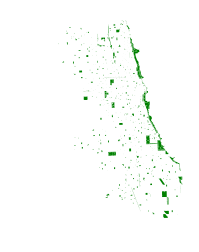

In [3]:
puu = parks.unary_union
tuu = tracts.unary_union

parks.plot(color = "green")
ax.set_axis_off()
# ax.figure.savefig("individual_parks.pdf")

In [4]:
tracts["park_area"] = tracts.centroid.buffer(500).intersection(puu).area
tracts["distance"]  = tracts.centroid.distance(puu)

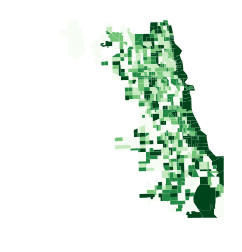

In [5]:
tracts.plot(column = "park_area", cmap = "Greens", scheme = "quantiles").set_axis_off()

In [6]:
geo = [puu]
for r in range(1, 30):
    
    print(r, end = " ")
    g = []
    for i, park in parks.iterrows():
        b = r * 10 * (np.log(float(park.acres)) + 5.5)
        if b <= 0: print("yowza", b)
        g.append(park.geometry.buffer(b))

    geo.append(shapely.ops.unary_union(g).intersection(tuu))#.difference(geo[-1]))

for r in range(29, 0, -1):
    print(r, end = " ")
    geo[r] = geo[r].difference(geo[r-1])

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 

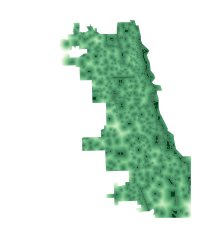

In [7]:
gdf = gpd.GeoDataFrame(geometry = geo, crs = {'init': 'epsg:3528', 'no_defs': True})
gdf["dist"] = gdf.index
ax = gdf.plot(column = "dist", cmap = "Greens_r")
ax.set_axis_off()
# ax.figure.savefig("parks_variable_buffer.pdf")